In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage, dendrogram

Step 1

In [96]:
df = pd.read_csv("customers.csv")

num_features = ["Age", "Income", "Score"]
X = df[num_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(
    X_scaled,
    columns = num_features
)

X_scaled.head()

,Age,Income,Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Step 2

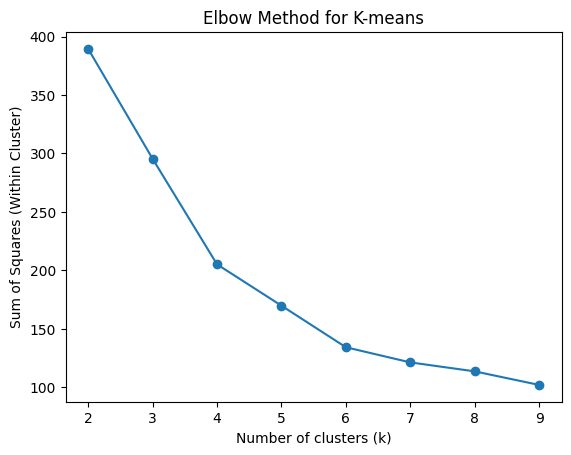

In [97]:
sos = [] # Sum of squares
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    sos.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, sos, marker = 'o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squares (Within Cluster)")
plt.title("Elbow Method for K-means")
plt.show()

Step 3

In [98]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df.head()

,ID,Gender,Age,Income,Score,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [99]:
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

centroids = pd.DataFrame(
    centroids,
    columns = num_features
)

centroids

,Age,Income,Score
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


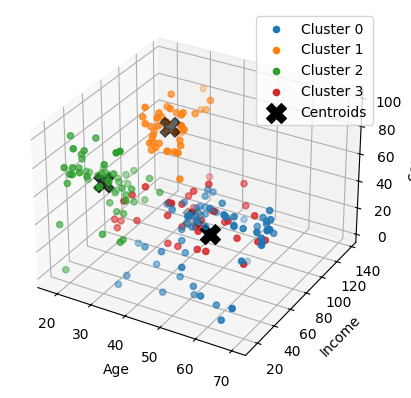

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for c in range(4):
    cluster_data = df[df["Cluster"] == c]
    ax.scatter(
        cluster_data["Age"],
        cluster_data["Income"],
        cluster_data["Score"],
        label = f"Cluster {c}"
    )

ax.scatter(
    centroids["Age"],
    centroids["Income"],
    centroids["Score"],
    c = 'black',
    s = 200,
    marker = 'X',
    label = "Centroids"
)

ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Score")
ax.legend()
plt.show()

The plot does show meaniful results as the clusters are well separated, highlight different customer segments, and represent the `centroids` table well.

In [101]:
centroids

,Age,Income,Score
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


Cluster 0:
- Older age
- Lower income
- Lower score
- Lower-value, lower-engagement segment

Cluster 1:
- Younger age
- Higher income
- Higher score
- Higher-value, higher-engagement segment

Cluster 2:
- Younger age
- Lower income
- Moderate score
- Lower-value, moderate-engagement segment

Cluster 3:
- Middle age
- Higher income
- Lower score
- Higher-value, lower-engagement segment

Step 4

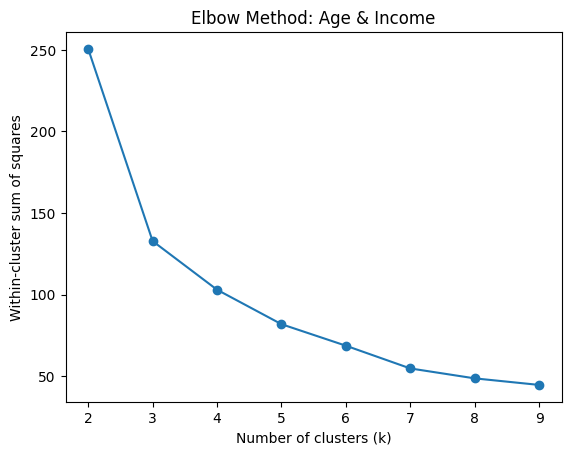

In [102]:
# Age and Income
X_age_income = X_scaled[["Age", "Income"]]

sos_ai = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_age_income)
    sos_ai.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, sos_ai, marker = 'o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares")
plt.title("Elbow Method: Age & Income")
plt.show()


best k = 3

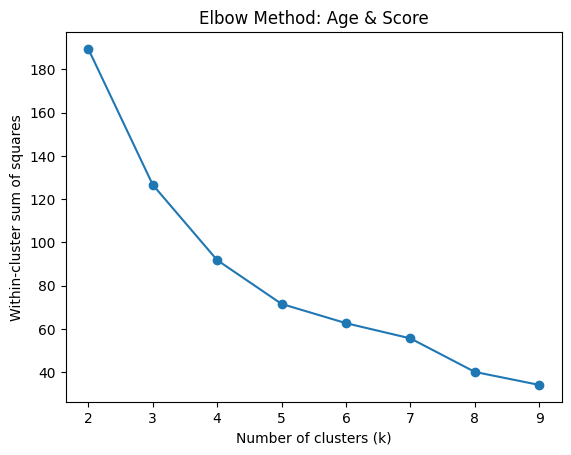

In [103]:
# Age and Score
X_age_score = X_scaled[["Age", "Score"]]

sos_as = []

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_age_score)
    sos_as.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, sos_as, marker = 'o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares")
plt.title("Elbow Method: Age & Score")
plt.show()


best k = 4

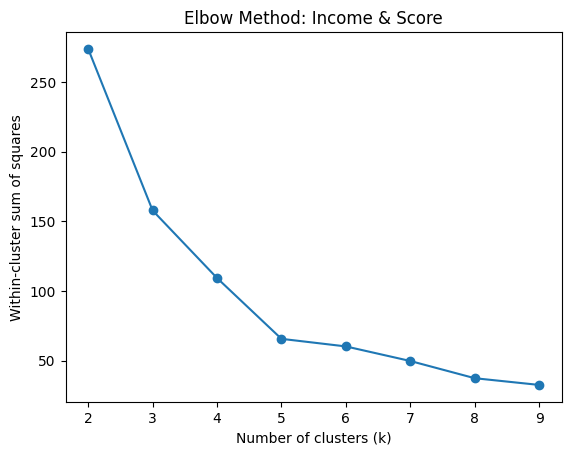

In [104]:
# Income and Score
X_income_score = X_scaled[["Income", "Score"]]

sos_is = []

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_income_score)
    sos_is.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, sos_is, marker = 'o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares")
plt.title("Elbow Method: Income & Score")
plt.show()


best k = 5

Step 5

In [105]:
pairs = {
    "Age & Income": (["Age", "Income"], 3),
    "Age & Score": (["Age", "Score"], 4),
    "Income & Score": (["Income", "Score"], 5),
}

for name, (cols, k) in pairs.items():
    km = KMeans(n_clusters = k, random_state = 42)
    df[f"Cluster_{name}"] = km.fit_predict(X_scaled[cols])



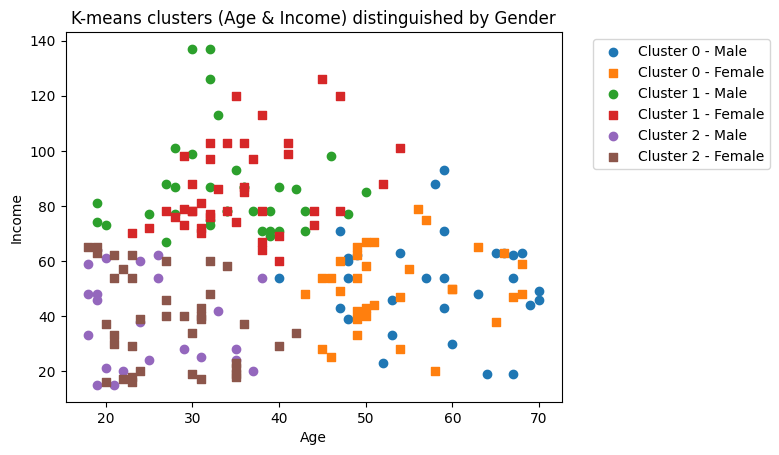

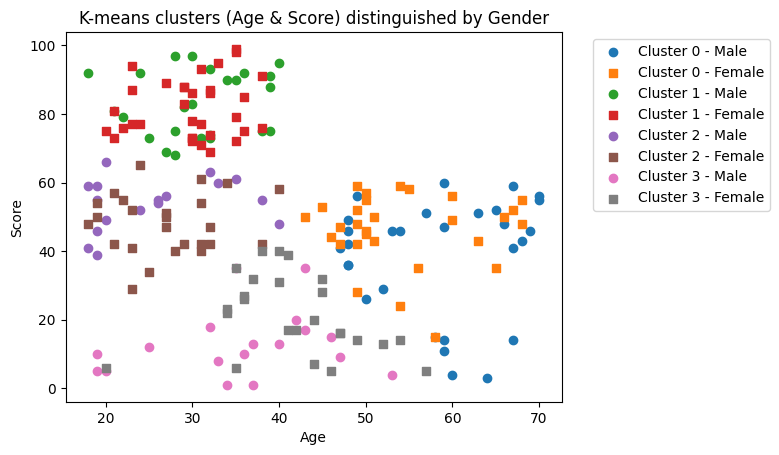

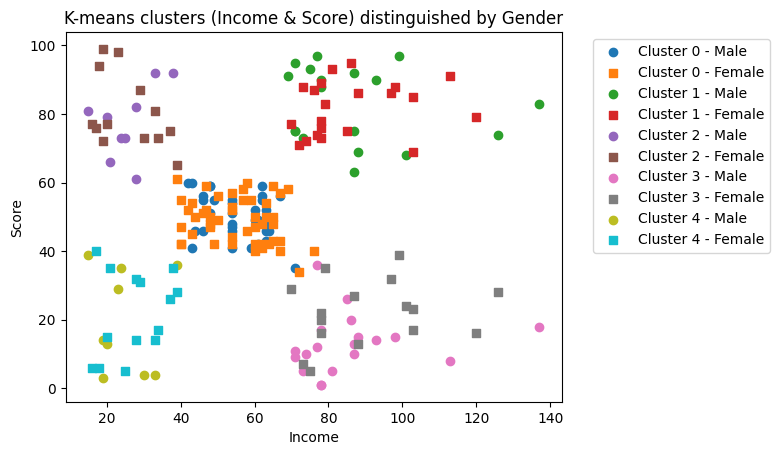

In [106]:
markers = {"Male": "o", "Female": "s"}

for name, (cols, k) in pairs.items():
    x_col, y_col = cols
    cluster_col = f"Cluster_{name}"

    plt.figure()

    for c in range(k):
        for gender, m in markers.items():
            mask = (df[cluster_col] == c) & (df["Gender"] == gender)
            plt.scatter(
                df.loc[mask, x_col],
                df.loc[mask, y_col],
                marker=m,
                label=f"Cluster {c} - {gender}"
            )

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"K-means clusters ({name}) distinguished by Gender")
    plt.legend(bbox_to_anchor=(1.05, 1), loc = "upper left")
    plt.show()



In [107]:
for name, (_, k) in pairs.items():
    cluster_col = f"Cluster_{name}"
    print("\n" + name)
    display(pd.crosstab(df[cluster_col], df["Gender"], normalize = "index"))



Age & Income


Gender,Female,Male
Cluster_Age & Income,,
0,0.523810,0.476190
1,0.539474,0.460526
2,0.622951,0.377049



Age & Score


Gender,Female,Male
Cluster_Age & Score,,
0,0.500000,0.500000
1,0.578947,0.421053
2,0.595238,0.404762
3,0.581395,0.418605



Income & Score


Gender,Female,Male
Cluster_Income & Score,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.457143,0.542857
4,0.608696,0.391304


Distinguishing clusters by Gender across all feature pairs does not reveal additional customer subsegments. Both visual inspection and cluster-wise gender proportions indicate that Gender is evenly distributed within clusters and does not show a systematic relationship with the clusters formed by Age, Income, and Score. Therefore, converting Gender into a binary variable and including it in K-means is unlikely to improve clustering quality and may instead introduce noise.

Step 6

In [108]:
df_noisy = pd.read_csv("customers_noisy.csv")

features = ["Gender", "Age", "Income", "Score", "Noisy1", "Noisy2", "Noisy3", "Noisy4"]
X = df_noisy[features]

scaler_noisy = StandardScaler()
X_scaled_noisy = scaler_noisy.fit_transform(X)


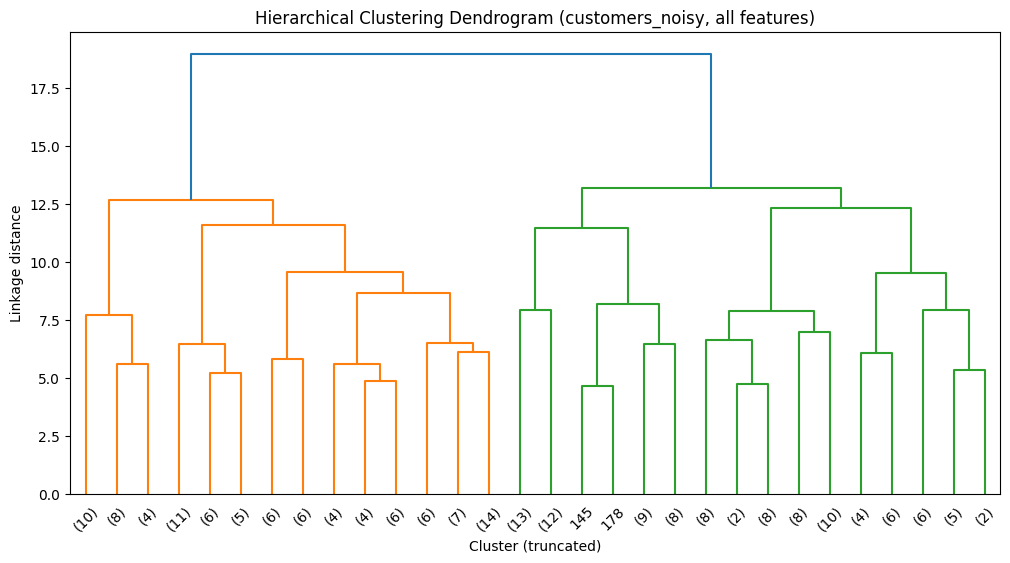

In [109]:
Z = linkage(X_scaled_noisy, method = "ward")

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode = "lastp", p = 30, leaf_rotation = 45, leaf_font_size = 10)
plt.title("Hierarchical Clustering Dendrogram (customers_noisy, all features)")
plt.xlabel("Cluster (truncated)")
plt.ylabel("Linkage distance")
plt.show()


The dendrogram shows how observations merge into clusters as the linkage distance increases. Because hierarchical clustering uses distance-based merging, adding the four noisy features reduces the clarity of the cluster structure. The merges occur more gradually and there is no single dominant jump that clearly indicates an optimal number of clusters. This occurs because the noisy variables add random variation to the distance calculations, making similar customers appear less similar and causing clusters to merge earlier than expected. As a result, the dendrogram suggests weaker natural separation compared to clustering using only Age, Income, and Score.